In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [75]:
def correlation(corr_df:pd.DataFrame)->None:
    """
    This function calculates the correlation matrix using the pearson method and plots a heatmap of the matrix
    :param corr_df: A pandas dataframe containing data of all the states
    """
    corr_matrix=corr_df[['Air_Pollution','Population','Asthma','Smoking','Population_Density']].corr(method='pearson')
    sns.set(rc = {'figure.figsize':(12,6)})
    sns.heatmap(corr_matrix, cmap="RdBu",linewidth=0.5,fmt='.2f',annot=True,vmin=-1,vmax=1, annot_kws={'fontsize':14,'fontweight':'bold'})

In [73]:
def calling_plots(subset_df:pd.DataFrame,locations:list,subset_df2:pd.DataFrame,locations2:list)->None:
    """
    This function is calculates the subset of a dataframe with respective location
    :param subset_df: a pandas dataframe containing data of the states
    :param locations: a list containing the state names
    """
    for i in range(len(locations2)):
        sub_df=subset_df[subset_df['Location']==locations[i]]
        state=locations[i]
        sub_df2=subset_df2[subset_df2['Location']==locations2[i]]
        state2=locations2[i]
        plotting_top(sub_df,state)
        plotting_bottom(sub_df2,state2)

In [63]:
def plotting_top(data1:pd.DataFrame,state:str)->None:
    """
    This function plots a double line plot of Population VS Asthma over the years for densely populated states
    :param data1: a pandas dataframe containg data for the specific location
    :param state: a string containg the state name
    """
    scaler = MinMaxScaler()
    data1[["Population"]] = scaler.fit_transform(data1[["Population"]])
    data1[["Asthma"]] = scaler.fit_transform(data1[["Asthma"]])
    
    sns.lineplot(data=data1,x='Year',y=('Population'),label='Population')
    sns.lineplot(data=data1,x='Year',y=('Asthma'),label='Asthma')
    plt.xlabel('Years')
    plt.ylabel('Number of Persons')
    plt.title('Population and Asthma in densely populated states in United Stats- '+state,fontdict={'fontweight':'bold', 'fontsize':17})
    #plt.xticks(rotation=90)
    plt.figure(figsize=(12,6))
    plt.legend(labels=["Population","Asthma"])

In [71]:
def plotting_bottom(data2:pd.DataFrame,state:str)->None:
    """
    This function plots a double line plot of Population VS Asthma over the years for densely populated states
    :param data1: a pandas dataframe containg data for the specific location
    :param state: a string containg the state name
    """
    scaler = MinMaxScaler()
    data2[["Population"]] = scaler.fit_transform(data2[["Population"]])
    data2[["Asthma"]] = scaler.fit_transform(data2[["Asthma"]])
    
    sns.lineplot(data=data2,x='Year',y=('Population'),label='Population')
    sns.lineplot(data=data2,x='Year',y=('Asthma'),label='Asthma')
    plt.xlabel('Years')
    plt.ylabel('Number of Persons')
    plt.title('Population and Asthma in sparsely populated states in United Stats- '+state,fontdict={'fontweight':'bold', 'fontsize':17})
    #plt.xticks(rotation=90)
    plt.figure(figsize=(12,6))
    plt.legend(labels=["Population","Asthma"])

In [5]:
def correlation_factors(corr_data:pd.DataFrame)->None:
    """
    This function plots a line chart explaining the coorelation between various factors over the years
    :param corr_data: a pandas dataframe containg data of all the states over the years
    """
    corr_data=corr_data.groupby(['Year'])['Population','Population_Density','Smoking','Asthma','Air_Pollution'].sum()
    corr_data[["Population"]] = scaler.fit_transform(corr_data[["Population"]])
    corr_data[["Asthma"]] = scaler.fit_transform(corr_data[["Asthma"]])
    corr_data[["Smoking"]] = scaler.fit_transform(corr_data[["Smoking"]])
    corr_data[["Air_Pollution"]] = scaler.fit_transform(corr_data[["Air_Pollution"]])
    corr_data[["Population_Density"]] = scaler.fit_transform(corr_data[["Population_Density"]])
    plt.figure(figsize=(16,8))
    plt.title('Correlation between various factors and Asthma in United States',fontdict={'fontweight':'bold', 'fontsize':17})
    plt.plot(corr_data.index,corr_data['Population'],'b.-',linewidth=2, label='Population')
    plt.plot(corr_data.index,corr_data['Population_Density'],'r.-',linewidth=2,label='Population_Density')
    plt.plot(corr_data.index,corr_data['Asthma'],'g.-',linewidth=2, label='Asthma')
    plt.plot(corr_data.index,corr_data['Smoking'],'y.-',linewidth=2, label='Smoking')
    plt.plot(corr_data.index,corr_data['Air_Pollution'],'m.-',linewidth=2, label='Air_Pollution')
    plt.xlabel('Years')
    plt.ylabel('Number of Persons')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
def calculate_rate(data):
    """
    This function calculates the difference of Population and Asthma in consecutive years and timeframe
    :param data: a pandas dataframe consisting of data of all the states over the years
    :return: returns a pandas dataframe containg the difference and timeframe
    """
    data=data.sort_values(by=['Location','Year'], inplace=False, ascending=True)
    data['TimeFrame']=''
    for i in range(1,len(data)-1):
        data['TimeFrame'][i-1] = data['Year'][i-1] + "-" + data['Year'][i]
    data['Population_Diff']=data['Population'].diff()
    data['Asthma_Diff']=data['Asthma'].diff()
    return data

In [7]:
def top(data_file:pd.DataFrame):
    """
    This function calculates the top5 and the bottom5 populated states over the years 
    :param data_file: 
    :return: This function returns two list containing top5 and bottom5 populated states
    """
    years = data_file['Year'].unique()
    top5 = []
    bottom5 = []
    for i in range(len(years)):
        data2 = data_file[data_file['Year'] == years[i]]
        d1 = data2.sort_values(by=['Population'], inplace=False, ascending=False)
        top = d1.head(5)
        bottom = d1.tail(5)
        top_states = top['Location'].tolist()
        bottom_states = bottom['Location'].tolist()
        top5.append(top_states)
        bottom5.append(bottom_states)

    top5 = [i for elem in top5 for i in elem]
    top5 = set(top5)
    top5 = list(top5)
    bottom5 = [i for elem in bottom5 for i in elem]
    bottom5 = set(bottom5)
    bottom5 = list(bottom5)
    return top5, bottom5


In [8]:
def dropping_rows(df:pd.DataFrame, states:list):
    """
    This function takes the dataframe and states input and drops the unnecessary rows
    :param df: a pandas dataframe consisting data of all the states over the years
    :param states: a list containing the desired states
    :return: a pandas dataframe consisting data of the require states
    """
    for i in range(len(df)):
        if df['Location'][i] not in states:
            df = df.drop([i])
        else:
            pass
    df = df.reset_index()
    df = df.drop(columns=['index'])
    df=''
    return df

In [26]:
final_data = pd.read_csv('C:/Users/PC/Desktop/2021Fall_finals/Datasets/DATA.csv')
scaler = MinMaxScaler()
    
for i in range(len(final_data)):
    if final_data['Location'][i]=="Location":
        final_data=final_data.drop([i])

final_data=final_data.reset_index()
final_data=final_data.drop(['index'], axis=1)
final_data

,Location,Air_Pollution,Asthma,Smoking,Population,Population_Density,Year
0,Alabama,11.0,8.0,24.3,4696000.0,92.72386217790502,2012
1,Alaska,6.0,8.2,22.9,706200.0,1.2375556610898972,2012
2,Arizona,9.4,9.7,19.3,6386300.0,56.22039896473405,2012
3,Arkansas,10.8,9.5,27.0,2860200.0,54.96684923609109,2012
4,California,15.3,8.4,13.7,37221500.0,238.93785426790518,2012
...,...,...,...,...,...,...,...
445,Virginia,6.9,8.8,14.0,8631393.0,218.57161306659913,2020
446,Washington,8.3,9.9,12.6,7705281.0,115.94560310581437,2020
447,West Virginia,7.4,11.5,23.8,1793716.0,74.62001830435145,2020
448,Wisconsin,7.0,10.2,15.4,5893718.0,108.82451346061524,2020


In [31]:
final_data[['Air_Pollution','Population','Asthma','Smoking','Population_Density']].apply(pd.to_numeric)
dict_columns_type = {'Air_Pollution':float,'Asthma':float,'Smoking':float,'Population':float,'Population_Density':float}
final_data = final_data.astype(dict_columns_type)
for i in range(len(final_data)):
        final_data['Air_Pollution'][i] = (final_data['Air_Pollution'][i] * final_data['Population'][i])/ 100
        final_data['Smoking'][i] = (final_data['Smoking'][i] * final_data['Population'][i]) / 100
        final_data['Asthma'][i] = (final_data['Asthma'][i] * final_data['Population'][i]) / 100

C:\Users\PC\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\PC\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PC\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


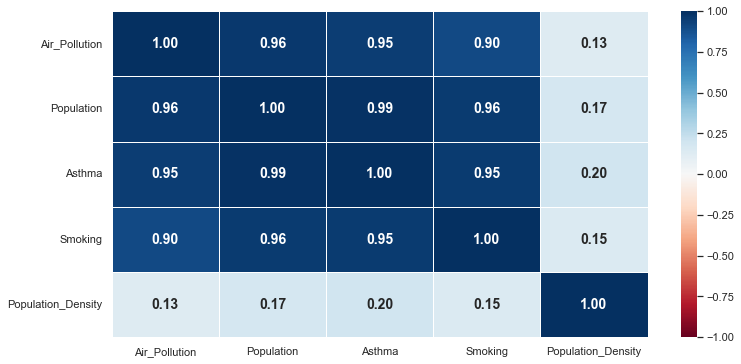

In [76]:
correlation(final_data)

C:\Users\PC\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PC\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PC\miniconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

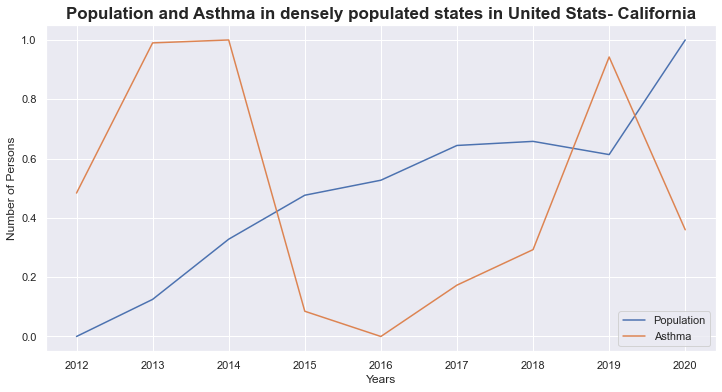

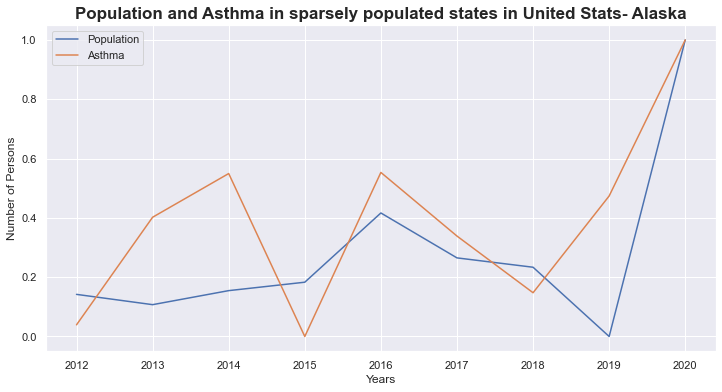

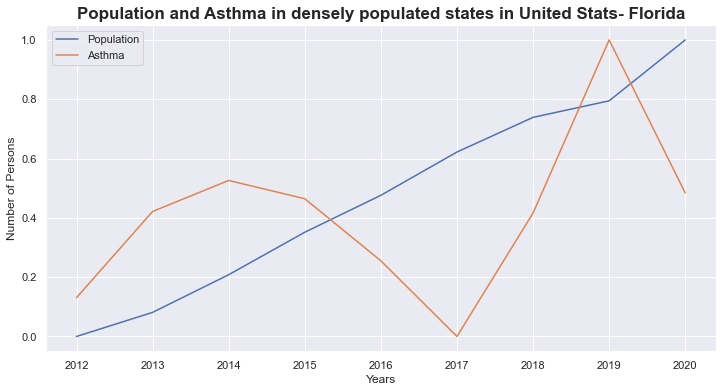

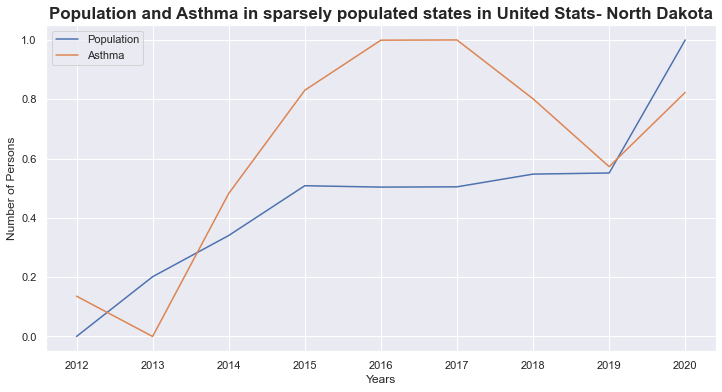

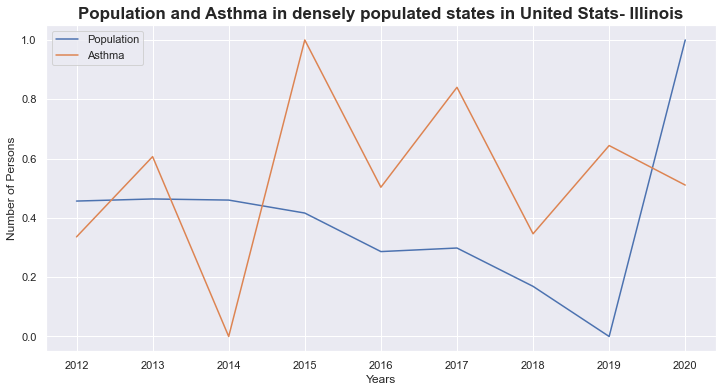

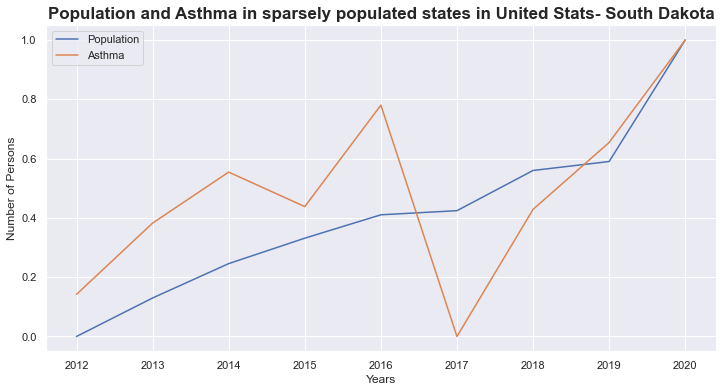

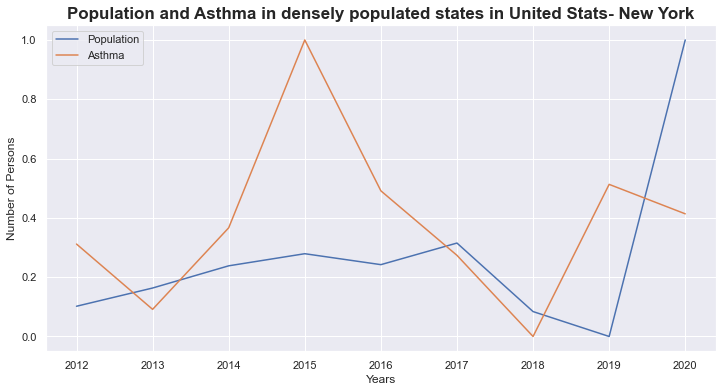

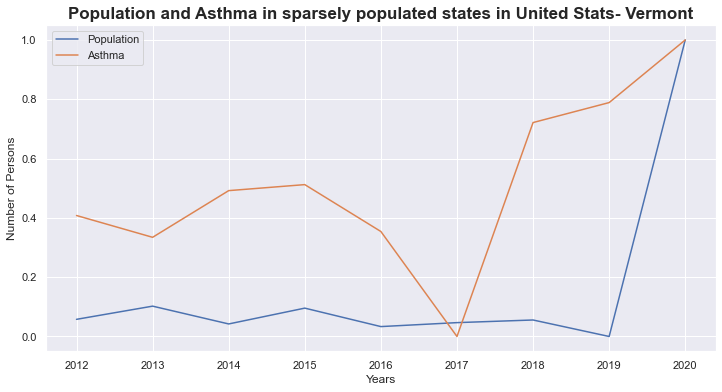

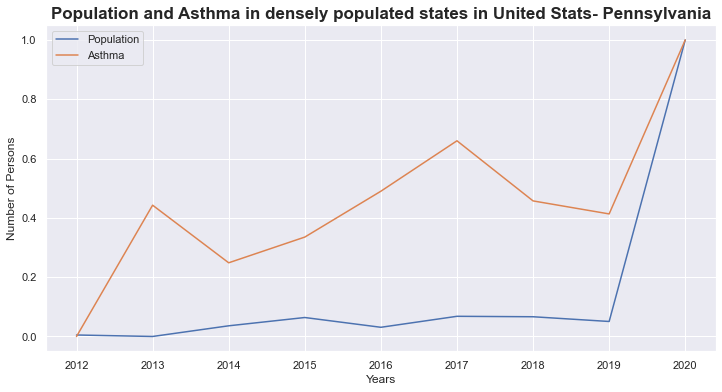

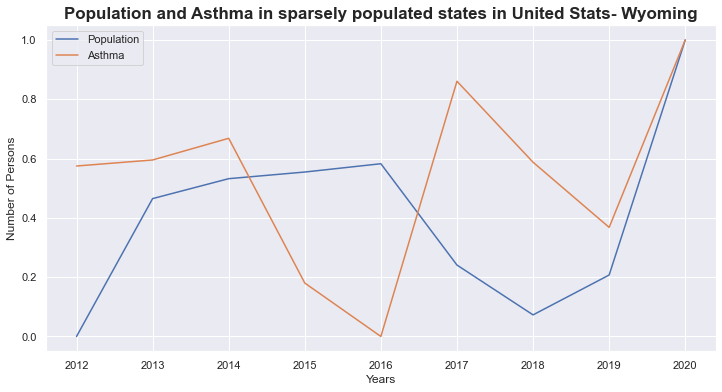

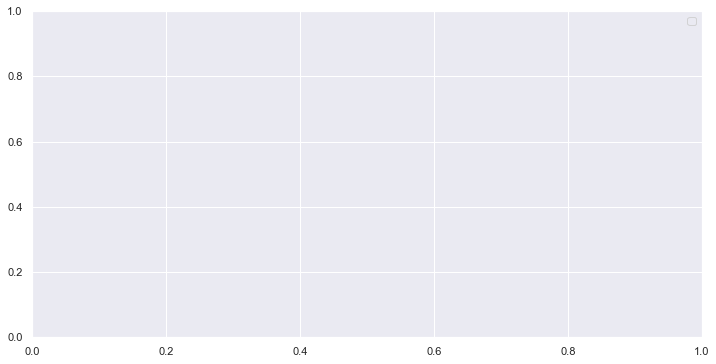

In [77]:
rate_data=calculate_rate(final_data)
top_location, bottom_location=top(rate_data)
rate_data_top=dropping_rows(rate_data, top_location)
rate_data_bottom=dropping_rows(rate_data,bottom_location)
calling_plots(rate_data_top,rate_data_top['Location'].unique(),rate_data_bottom, rate_data_bottom['Location'].unique())
#print(rate_data_bottom['Location'].unique())


C:\Users\PC\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


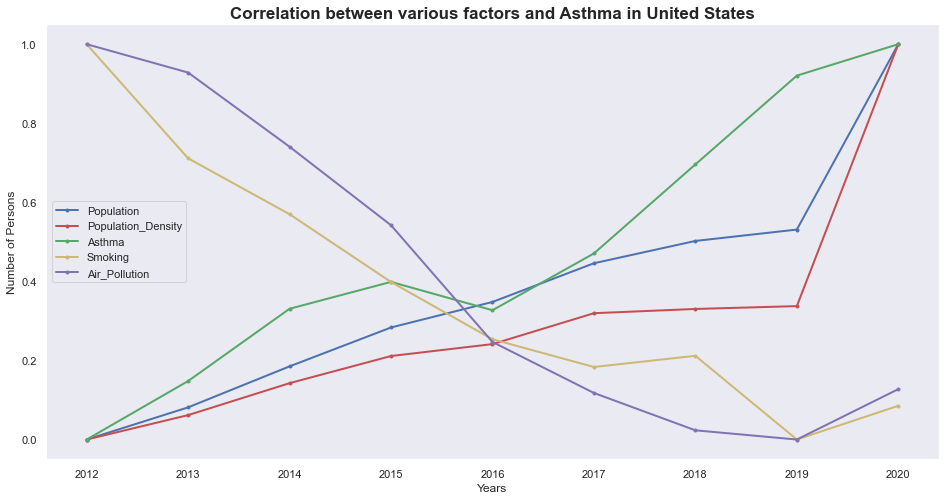

In [37]:
correlation_factors(rate_data)

In [78]:
def bar_graph(df_bar,top_state):
    #x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(df_bar['Population_Diff'], width, label='Diff. in Population')
    rects2 = ax.bar(df_bar['Asthma_Diff'], width, label='Diff. in Asthma')

# Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Increase/Decrease')
    ax.set_title('Years')
    #ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()